## Imports

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point


## Setup Data

In [2]:
df = pd.read_csv("./data/ny_accidents.csv")

In [3]:
df.shape
df.columns

(39537, 48)

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance.mi.', 'Description',
       'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature.F.', 'Wind_Chill.F.', 'Humidity...', 'Pressure.in.',
       'Visibility.mi.', 'Wind_Direction', 'Wind_Speed.mph.',
       'Precipitation.in.', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df1 = df.drop(['Number', 'City', 'Airport_Code'], axis=1)

In [5]:
s = df1.isnull().any()  # check for mising values in any of the columns (returns a Pandas Series containing booleans)
# print whether there are any missing values
if (len(s[s == True]) > 0):
    cols_na = s[s == True].keys().values
    # remove any missing values
    df_cln = df1.dropna()
    # print the names of the columns containing null values
    print(f"There are {len(df1) - len(df_cln)} rows with missing values. The columns ({len(cols_na)}) in the dataset that contain missing values are: {cols_na}.")
    print("Rows with missing values in the dataset have been removed and new dataframe df_cln has been created")
else:
    print("There are no missing values in the dataset")

There are 2758 rows with missing values. The columns (14) in the dataset that contain missing values are: ['Weather_Timestamp' 'Temperature.F.' 'Wind_Chill.F.' 'Humidity...'
 'Pressure.in.' 'Visibility.mi.' 'Wind_Direction' 'Wind_Speed.mph.'
 'Precipitation.in.' 'Weather_Condition' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight'].
Rows with missing values in the dataset have been removed and new dataframe df_cln has been created


In [6]:
df_cln.shape
df_cln.columns

(36779, 45)

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance.mi.', 'Description',
       'Street', 'Side', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Weather_Timestamp', 'Temperature.F.', 'Wind_Chill.F.', 'Humidity...',
       'Pressure.in.', 'Visibility.mi.', 'Wind_Direction', 'Wind_Speed.mph.',
       'Precipitation.in.', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df_cln['End_Time'] = pd.to_datetime(df_cln['End_Time'])
df_cln['Start_Time'] = pd.to_datetime(df_cln['Start_Time'])
df_cln[['Start_Time','End_Time']].head()
df_cln['Duration'] = df_cln['End_Time'] - df_cln['Start_Time']

/tmp/ipykernel_18880/1617812007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['End_Time'] = pd.to_datetime(df_cln['End_Time'])
/tmp/ipykernel_18880/1617812007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Start_Time'] = pd.to_datetime(df_cln['Start_Time'])


,Start_Time,End_Time
0,2020-12-03 20:52:00,2020-12-03 22:17:27
1,2020-09-25 23:19:55,2020-09-25 23:41:46
2,2020-10-15 12:17:30,2020-10-16 03:44:00
3,2020-10-03 02:58:56,2020-10-03 04:40:33
5,2020-12-17 04:51:00,2020-12-17 06:54:34


/tmp/ipykernel_18880/1617812007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Duration'] = df_cln['End_Time'] - df_cln['Start_Time']


In [8]:
df_cln.loc[:,'Duration_mins'] = round(df_cln.loc[:,'Duration'] / np.timedelta64(1, 'm'))
df_cln = df_cln[df_cln['Duration_mins'] < 600]
df_cln['Duration_mins'].head()

/home/engo/miniconda3/envs/geo_env/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0     85.0
1     22.0
3    102.0
5    124.0
6    323.0
Name: Duration_mins, dtype: float64

In [9]:
df_cln['Time_of_Year'] = ''
for year in [2019,2020]:
    spring_start = dt.datetime(year, 3, 1, 0, 0, 0)
    summer_start = dt.datetime(year, 6, 1, 0, 0, 0)
    autumn_start = dt.datetime(year, 9, 1, 0, 0, 0)
    winter_start = dt.datetime(year, 12, 1, 0, 0, 0)
    df_cln['Time_of_Year'].mask((df_cln['Start_Time'] >= spring_start) & (df_cln['Start_Time'] < summer_start), 'Spring', inplace=True)
    df_cln['Time_of_Year'].mask((df_cln['Start_Time'] >= summer_start) & (df_cln['Start_Time'] < autumn_start), 'Summer', inplace=True)
    df_cln['Time_of_Year'].mask((df_cln['Start_Time'] >= autumn_start) & (df_cln['Start_Time'] < winter_start), 'Autumn', inplace=True)
df_cln['Time_of_Year'].mask(df_cln['Time_of_Year'] == '', 'Winter', inplace=True)

## Geo-location

In [11]:
nyc_geo = geopandas.read_file("./data/counties_ny.geojson")
nyc_geo.head()

,cartodb_id,state_fips,state_name,county,housing_un,fips,county_fip,updated_at,created_at,geometry
0,27,36,New York,Putnam,None,36079,79,2012-06-15T00:00:00,2012-06-15T00:00:00,"MULTIPOLYGON (((-73.54429 41.36530, -73.98001 ..."
1,1,36,New York,Franklin,None,36033,33,2012-06-15T00:00:00,2012-06-15T00:00:00,"MULTIPOLYGON (((-74.02154 44.99085, -73.99638 ..."
2,41,36,New York,Orleans,None,36073,73,2012-06-15T00:00:00,2012-06-15T00:00:00,"MULTIPOLYGON (((-78.46636 43.13000, -78.46465 ..."
3,28,36,New York,Westchester,None,36119,119,2012-06-15T00:00:00,2012-06-15T00:00:00,"MULTIPOLYGON (((-73.89670 40.99853, -73.89112 ..."
4,2,36,New York,Albany,None,36001,1,2012-06-15T00:00:00,2012-06-15T00:00:00,"MULTIPOLYGON (((-73.77953 42.46029, -74.25051 ..."


In [12]:
df_cln['coordinates'] = df_cln[['Start_Lng', 'Start_Lat']].values.tolist()
df_cln['coordinates'] = df_cln['coordinates'].apply(Point)
df_cln = geopandas.GeoDataFrame(df_cln, geometry='coordinates')
df_cln.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Duration_mins,Time_of_Year,delay_cat,coordinates
0,237351,A-2953957,2,2020-12-03 20:52:00,2020-12-03 22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,...,False,Night,Night,Night,Night,0 days 01:25:27,85.0,Winter,3,POINT (-75.29320 43.11944)
1,237362,A-2953968,2,2020-09-25 23:19:55,2020-09-25 23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,...,False,Night,Night,Night,Night,0 days 00:21:51,22.0,Autumn,1,POINT (-73.86624 40.83488)
3,237402,A-2954008,2,2020-10-03 02:58:56,2020-10-03 04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,...,False,Night,Night,Night,Night,0 days 01:41:37,102.0,Autumn,3,POINT (-78.99062 43.07367)
5,237470,A-2954079,2,2020-12-17 04:51:00,2020-12-17 06:54:34,41.519447,-74.023808,41.519377,-74.018308,0.285,...,False,Night,Night,Night,Night,0 days 02:03:34,124.0,Winter,3,POINT (-74.02381 41.51945)
6,237508,A-2954117,2,2020-10-30 20:33:31,2020-10-31 01:56:42,40.934782,-73.865086,40.931725,-73.876216,0.618,...,False,Night,Night,Night,Night,0 days 05:23:11,323.0,Autumn,4,POINT (-73.86509 40.93478)


In [13]:
nyc_geo['coords'] = nyc_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
nyc_geo['coords'] = [coords[0] for coords in nyc_geo['coords']]

[Text(0.5, 1.0, 'NY Traffic Incidents by Duration in Spring')]

<AxesSubplot:title={'center':'NY Traffic Incidents by Duration in Spring'}>

/tmp/ipykernel_18880/819141350.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  base.annotate(s=row['county'], xy=row['coords'], horizontalalignment='center')


Text(-73.7538326011969, 41.4182975, 'Putnam')

Text(-74.26439863026063, 44.562175499999995, 'Franklin')

Text(-78.22847060500078, 43.250662, 'Orleans')

Text(-73.78775083209922, 41.1215825, 'Westchester')

Text(-73.96237346899383, 42.632553, 'Albany')

Text(-74.79749255576186, 41.7207725, 'Sullivan')

Text(-73.93018026739352, 40.669968, 'Kings')

Text(-78.75830143075186, 43.206477500000005, 'Niagara')

Text(-76.06649609319277, 42.5186815, 'Cortland')

Text(-73.84528035286542, 40.861531, 'Bronx')

Text(-73.68322942824543, 44.7121955, 'Clinton')

Text(-73.74464651042652, 44.154811, 'Essex')

Text(-74.49500025025141, 43.600288, 'Hamilton')

Text(-74.95758566463469, 43.4089065, 'Herkimer')

Text(-73.43394802944366, 43.4118435, 'Washington')

Text(-73.9030817701902, 43.458109, 'Warren')

Text(-74.05634960115823, 41.168457000000004, 'Rockland')

Text(-73.8522469602585, 43.0460375, 'Saratoga')

Text(-74.43186450427382, 43.139627, 'Fulton')

Text(-74.42239716109734, 42.923394, 'Montgomery')

Text(-73.4791945526404, 42.7210265, 'Rensselaer')

Text(-74.04937962034461, 42.828256, 'Schenectady')

Text(-74.98419866854425, 42.606049, 'Otsego')

Text(-74.41982612463772, 42.607938000000004, 'Schoharie')

Text(-74.95333743811233, 42.181783, 'Delaware')

Text(-73.63062539774103, 42.2504555, 'Columbia')

Text(-74.13354207134202, 42.2783515, 'Greene')

Text(-74.22669422878957, 41.8920585, 'Ulster')

Text(-73.72751859304648, 41.749658499999995, 'Dutchess')

Text(-74.33923603176535, 41.3860095, 'Orange')

Text(-73.5700790852637, 40.7498595, 'Nassau')

Text(-73.97113605600792, 40.76760899999999, 'New York')

Text(-73.82077633178227, 40.7082915, 'Queens')

Text(-77.68190691744894, 43.186392, 'Monroe')

Text(-72.89785490936717, 40.912724499999996, 'Suffolk')

Text(-74.14961142174798, 40.573225, 'Richmond')

Text(-75.07518327408985, 44.664081499999995, 'St. Lawrence')

Text(-75.83061196171062, 44.036086, 'Jefferson')

Text(-75.49207923832432, 43.837385999999995, 'Lewis')

Text(-76.19937085461297, 43.4418795, 'Oswego')

Text(-75.48398013612854, 43.237181, 'Oneida')

Text(-76.60654914737779, 43.018454, 'Cayuga')

Text(-77.03922246786613, 43.180839000000006, 'Wayne')

Text(-76.20012137612365, 43.050821, 'Onondaga')

Text(-75.72454746213268, 42.992926, 'Madison')

Text(-78.18639167402426, 43.004691, 'Genesee')

Text(-78.70711638527582, 42.742079000000004, 'Erie')

Text(-77.27880660322889, 42.812090999999995, 'Ontario')

Text(-76.85572086544303, 42.783686, 'Seneca')

Text(-78.01922890904794, 42.235346, 'Allegany')

Text(-77.78128394283043, 42.721505, 'Livingston')

Text(-78.20518093877337, 42.7304025, 'Wyoming')

Text(-77.12913359663925, 42.621288500000006, 'Yates')

Text(-75.62655148586754, 42.448777, 'Chenango')

Text(-76.47671846898447, 42.48030249999999, 'Tompkins')

Text(-77.41298434846146, 42.3742335, 'Steuben')

Text(-79.33089783801148, 42.343344, 'Chautauqua')

Text(-76.89459996423585, 42.375014, 'Schuyler')

Text(-78.68195400893036, 42.2239715, 'Cattaraugus')

Text(-75.85491646016104, 42.215973, 'Broome')

Text(-76.30546744577937, 42.215973, 'Tioga')

Text(-76.7603353549206, 42.1031835, 'Chemung')

[Text(0.5, 1.0, 'NY Traffic Incidents by Duration in Summer')]

<AxesSubplot:title={'center':'NY Traffic Incidents by Duration in Summer'}>

/tmp/ipykernel_18880/819141350.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  base.annotate(s=row['county'], xy=row['coords'], horizontalalignment='center')


Text(-73.7538326011969, 41.4182975, 'Putnam')

Text(-74.26439863026063, 44.562175499999995, 'Franklin')

Text(-78.22847060500078, 43.250662, 'Orleans')

Text(-73.78775083209922, 41.1215825, 'Westchester')

Text(-73.96237346899383, 42.632553, 'Albany')

Text(-74.79749255576186, 41.7207725, 'Sullivan')

Text(-73.93018026739352, 40.669968, 'Kings')

Text(-78.75830143075186, 43.206477500000005, 'Niagara')

Text(-76.06649609319277, 42.5186815, 'Cortland')

Text(-73.84528035286542, 40.861531, 'Bronx')

Text(-73.68322942824543, 44.7121955, 'Clinton')

Text(-73.74464651042652, 44.154811, 'Essex')

Text(-74.49500025025141, 43.600288, 'Hamilton')

Text(-74.95758566463469, 43.4089065, 'Herkimer')

Text(-73.43394802944366, 43.4118435, 'Washington')

Text(-73.9030817701902, 43.458109, 'Warren')

Text(-74.05634960115823, 41.168457000000004, 'Rockland')

Text(-73.8522469602585, 43.0460375, 'Saratoga')

Text(-74.43186450427382, 43.139627, 'Fulton')

Text(-74.42239716109734, 42.923394, 'Montgomery')

Text(-73.4791945526404, 42.7210265, 'Rensselaer')

Text(-74.04937962034461, 42.828256, 'Schenectady')

Text(-74.98419866854425, 42.606049, 'Otsego')

Text(-74.41982612463772, 42.607938000000004, 'Schoharie')

Text(-74.95333743811233, 42.181783, 'Delaware')

Text(-73.63062539774103, 42.2504555, 'Columbia')

Text(-74.13354207134202, 42.2783515, 'Greene')

Text(-74.22669422878957, 41.8920585, 'Ulster')

Text(-73.72751859304648, 41.749658499999995, 'Dutchess')

Text(-74.33923603176535, 41.3860095, 'Orange')

Text(-73.5700790852637, 40.7498595, 'Nassau')

Text(-73.97113605600792, 40.76760899999999, 'New York')

Text(-73.82077633178227, 40.7082915, 'Queens')

Text(-77.68190691744894, 43.186392, 'Monroe')

Text(-72.89785490936717, 40.912724499999996, 'Suffolk')

Text(-74.14961142174798, 40.573225, 'Richmond')

Text(-75.07518327408985, 44.664081499999995, 'St. Lawrence')

Text(-75.83061196171062, 44.036086, 'Jefferson')

Text(-75.49207923832432, 43.837385999999995, 'Lewis')

Text(-76.19937085461297, 43.4418795, 'Oswego')

Text(-75.48398013612854, 43.237181, 'Oneida')

Text(-76.60654914737779, 43.018454, 'Cayuga')

Text(-77.03922246786613, 43.180839000000006, 'Wayne')

Text(-76.20012137612365, 43.050821, 'Onondaga')

Text(-75.72454746213268, 42.992926, 'Madison')

Text(-78.18639167402426, 43.004691, 'Genesee')

Text(-78.70711638527582, 42.742079000000004, 'Erie')

Text(-77.27880660322889, 42.812090999999995, 'Ontario')

Text(-76.85572086544303, 42.783686, 'Seneca')

Text(-78.01922890904794, 42.235346, 'Allegany')

Text(-77.78128394283043, 42.721505, 'Livingston')

Text(-78.20518093877337, 42.7304025, 'Wyoming')

Text(-77.12913359663925, 42.621288500000006, 'Yates')

Text(-75.62655148586754, 42.448777, 'Chenango')

Text(-76.47671846898447, 42.48030249999999, 'Tompkins')

Text(-77.41298434846146, 42.3742335, 'Steuben')

Text(-79.33089783801148, 42.343344, 'Chautauqua')

Text(-76.89459996423585, 42.375014, 'Schuyler')

Text(-78.68195400893036, 42.2239715, 'Cattaraugus')

Text(-75.85491646016104, 42.215973, 'Broome')

Text(-76.30546744577937, 42.215973, 'Tioga')

Text(-76.7603353549206, 42.1031835, 'Chemung')

[Text(0.5, 1.0, 'NY Traffic Incidents by Duration in Autumn')]

<AxesSubplot:title={'center':'NY Traffic Incidents by Duration in Autumn'}>

/tmp/ipykernel_18880/819141350.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  base.annotate(s=row['county'], xy=row['coords'], horizontalalignment='center')


Text(-73.7538326011969, 41.4182975, 'Putnam')

Text(-74.26439863026063, 44.562175499999995, 'Franklin')

Text(-78.22847060500078, 43.250662, 'Orleans')

Text(-73.78775083209922, 41.1215825, 'Westchester')

Text(-73.96237346899383, 42.632553, 'Albany')

Text(-74.79749255576186, 41.7207725, 'Sullivan')

Text(-73.93018026739352, 40.669968, 'Kings')

Text(-78.75830143075186, 43.206477500000005, 'Niagara')

Text(-76.06649609319277, 42.5186815, 'Cortland')

Text(-73.84528035286542, 40.861531, 'Bronx')

Text(-73.68322942824543, 44.7121955, 'Clinton')

Text(-73.74464651042652, 44.154811, 'Essex')

Text(-74.49500025025141, 43.600288, 'Hamilton')

Text(-74.95758566463469, 43.4089065, 'Herkimer')

Text(-73.43394802944366, 43.4118435, 'Washington')

Text(-73.9030817701902, 43.458109, 'Warren')

Text(-74.05634960115823, 41.168457000000004, 'Rockland')

Text(-73.8522469602585, 43.0460375, 'Saratoga')

Text(-74.43186450427382, 43.139627, 'Fulton')

Text(-74.42239716109734, 42.923394, 'Montgomery')

Text(-73.4791945526404, 42.7210265, 'Rensselaer')

Text(-74.04937962034461, 42.828256, 'Schenectady')

Text(-74.98419866854425, 42.606049, 'Otsego')

Text(-74.41982612463772, 42.607938000000004, 'Schoharie')

Text(-74.95333743811233, 42.181783, 'Delaware')

Text(-73.63062539774103, 42.2504555, 'Columbia')

Text(-74.13354207134202, 42.2783515, 'Greene')

Text(-74.22669422878957, 41.8920585, 'Ulster')

Text(-73.72751859304648, 41.749658499999995, 'Dutchess')

Text(-74.33923603176535, 41.3860095, 'Orange')

Text(-73.5700790852637, 40.7498595, 'Nassau')

Text(-73.97113605600792, 40.76760899999999, 'New York')

Text(-73.82077633178227, 40.7082915, 'Queens')

Text(-77.68190691744894, 43.186392, 'Monroe')

Text(-72.89785490936717, 40.912724499999996, 'Suffolk')

Text(-74.14961142174798, 40.573225, 'Richmond')

Text(-75.07518327408985, 44.664081499999995, 'St. Lawrence')

Text(-75.83061196171062, 44.036086, 'Jefferson')

Text(-75.49207923832432, 43.837385999999995, 'Lewis')

Text(-76.19937085461297, 43.4418795, 'Oswego')

Text(-75.48398013612854, 43.237181, 'Oneida')

Text(-76.60654914737779, 43.018454, 'Cayuga')

Text(-77.03922246786613, 43.180839000000006, 'Wayne')

Text(-76.20012137612365, 43.050821, 'Onondaga')

Text(-75.72454746213268, 42.992926, 'Madison')

Text(-78.18639167402426, 43.004691, 'Genesee')

Text(-78.70711638527582, 42.742079000000004, 'Erie')

Text(-77.27880660322889, 42.812090999999995, 'Ontario')

Text(-76.85572086544303, 42.783686, 'Seneca')

Text(-78.01922890904794, 42.235346, 'Allegany')

Text(-77.78128394283043, 42.721505, 'Livingston')

Text(-78.20518093877337, 42.7304025, 'Wyoming')

Text(-77.12913359663925, 42.621288500000006, 'Yates')

Text(-75.62655148586754, 42.448777, 'Chenango')

Text(-76.47671846898447, 42.48030249999999, 'Tompkins')

Text(-77.41298434846146, 42.3742335, 'Steuben')

Text(-79.33089783801148, 42.343344, 'Chautauqua')

Text(-76.89459996423585, 42.375014, 'Schuyler')

Text(-78.68195400893036, 42.2239715, 'Cattaraugus')

Text(-75.85491646016104, 42.215973, 'Broome')

Text(-76.30546744577937, 42.215973, 'Tioga')

Text(-76.7603353549206, 42.1031835, 'Chemung')

[Text(0.5, 1.0, 'NY Traffic Incidents by Duration in Winter')]

<AxesSubplot:title={'center':'NY Traffic Incidents by Duration in Winter'}>

/tmp/ipykernel_18880/819141350.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  base.annotate(s=row['county'], xy=row['coords'], horizontalalignment='center')


Text(-73.7538326011969, 41.4182975, 'Putnam')

Text(-74.26439863026063, 44.562175499999995, 'Franklin')

Text(-78.22847060500078, 43.250662, 'Orleans')

Text(-73.78775083209922, 41.1215825, 'Westchester')

Text(-73.96237346899383, 42.632553, 'Albany')

Text(-74.79749255576186, 41.7207725, 'Sullivan')

Text(-73.93018026739352, 40.669968, 'Kings')

Text(-78.75830143075186, 43.206477500000005, 'Niagara')

Text(-76.06649609319277, 42.5186815, 'Cortland')

Text(-73.84528035286542, 40.861531, 'Bronx')

Text(-73.68322942824543, 44.7121955, 'Clinton')

Text(-73.74464651042652, 44.154811, 'Essex')

Text(-74.49500025025141, 43.600288, 'Hamilton')

Text(-74.95758566463469, 43.4089065, 'Herkimer')

Text(-73.43394802944366, 43.4118435, 'Washington')

Text(-73.9030817701902, 43.458109, 'Warren')

Text(-74.05634960115823, 41.168457000000004, 'Rockland')

Text(-73.8522469602585, 43.0460375, 'Saratoga')

Text(-74.43186450427382, 43.139627, 'Fulton')

Text(-74.42239716109734, 42.923394, 'Montgomery')

Text(-73.4791945526404, 42.7210265, 'Rensselaer')

Text(-74.04937962034461, 42.828256, 'Schenectady')

Text(-74.98419866854425, 42.606049, 'Otsego')

Text(-74.41982612463772, 42.607938000000004, 'Schoharie')

Text(-74.95333743811233, 42.181783, 'Delaware')

Text(-73.63062539774103, 42.2504555, 'Columbia')

Text(-74.13354207134202, 42.2783515, 'Greene')

Text(-74.22669422878957, 41.8920585, 'Ulster')

Text(-73.72751859304648, 41.749658499999995, 'Dutchess')

Text(-74.33923603176535, 41.3860095, 'Orange')

Text(-73.5700790852637, 40.7498595, 'Nassau')

Text(-73.97113605600792, 40.76760899999999, 'New York')

Text(-73.82077633178227, 40.7082915, 'Queens')

Text(-77.68190691744894, 43.186392, 'Monroe')

Text(-72.89785490936717, 40.912724499999996, 'Suffolk')

Text(-74.14961142174798, 40.573225, 'Richmond')

Text(-75.07518327408985, 44.664081499999995, 'St. Lawrence')

Text(-75.83061196171062, 44.036086, 'Jefferson')

Text(-75.49207923832432, 43.837385999999995, 'Lewis')

Text(-76.19937085461297, 43.4418795, 'Oswego')

Text(-75.48398013612854, 43.237181, 'Oneida')

Text(-76.60654914737779, 43.018454, 'Cayuga')

Text(-77.03922246786613, 43.180839000000006, 'Wayne')

Text(-76.20012137612365, 43.050821, 'Onondaga')

Text(-75.72454746213268, 42.992926, 'Madison')

Text(-78.18639167402426, 43.004691, 'Genesee')

Text(-78.70711638527582, 42.742079000000004, 'Erie')

Text(-77.27880660322889, 42.812090999999995, 'Ontario')

Text(-76.85572086544303, 42.783686, 'Seneca')

Text(-78.01922890904794, 42.235346, 'Allegany')

Text(-77.78128394283043, 42.721505, 'Livingston')

Text(-78.20518093877337, 42.7304025, 'Wyoming')

Text(-77.12913359663925, 42.621288500000006, 'Yates')

Text(-75.62655148586754, 42.448777, 'Chenango')

Text(-76.47671846898447, 42.48030249999999, 'Tompkins')

Text(-77.41298434846146, 42.3742335, 'Steuben')

Text(-79.33089783801148, 42.343344, 'Chautauqua')

Text(-76.89459996423585, 42.375014, 'Schuyler')

Text(-78.68195400893036, 42.2239715, 'Cattaraugus')

Text(-75.85491646016104, 42.215973, 'Broome')

Text(-76.30546744577937, 42.215973, 'Tioga')

Text(-76.7603353549206, 42.1031835, 'Chemung')

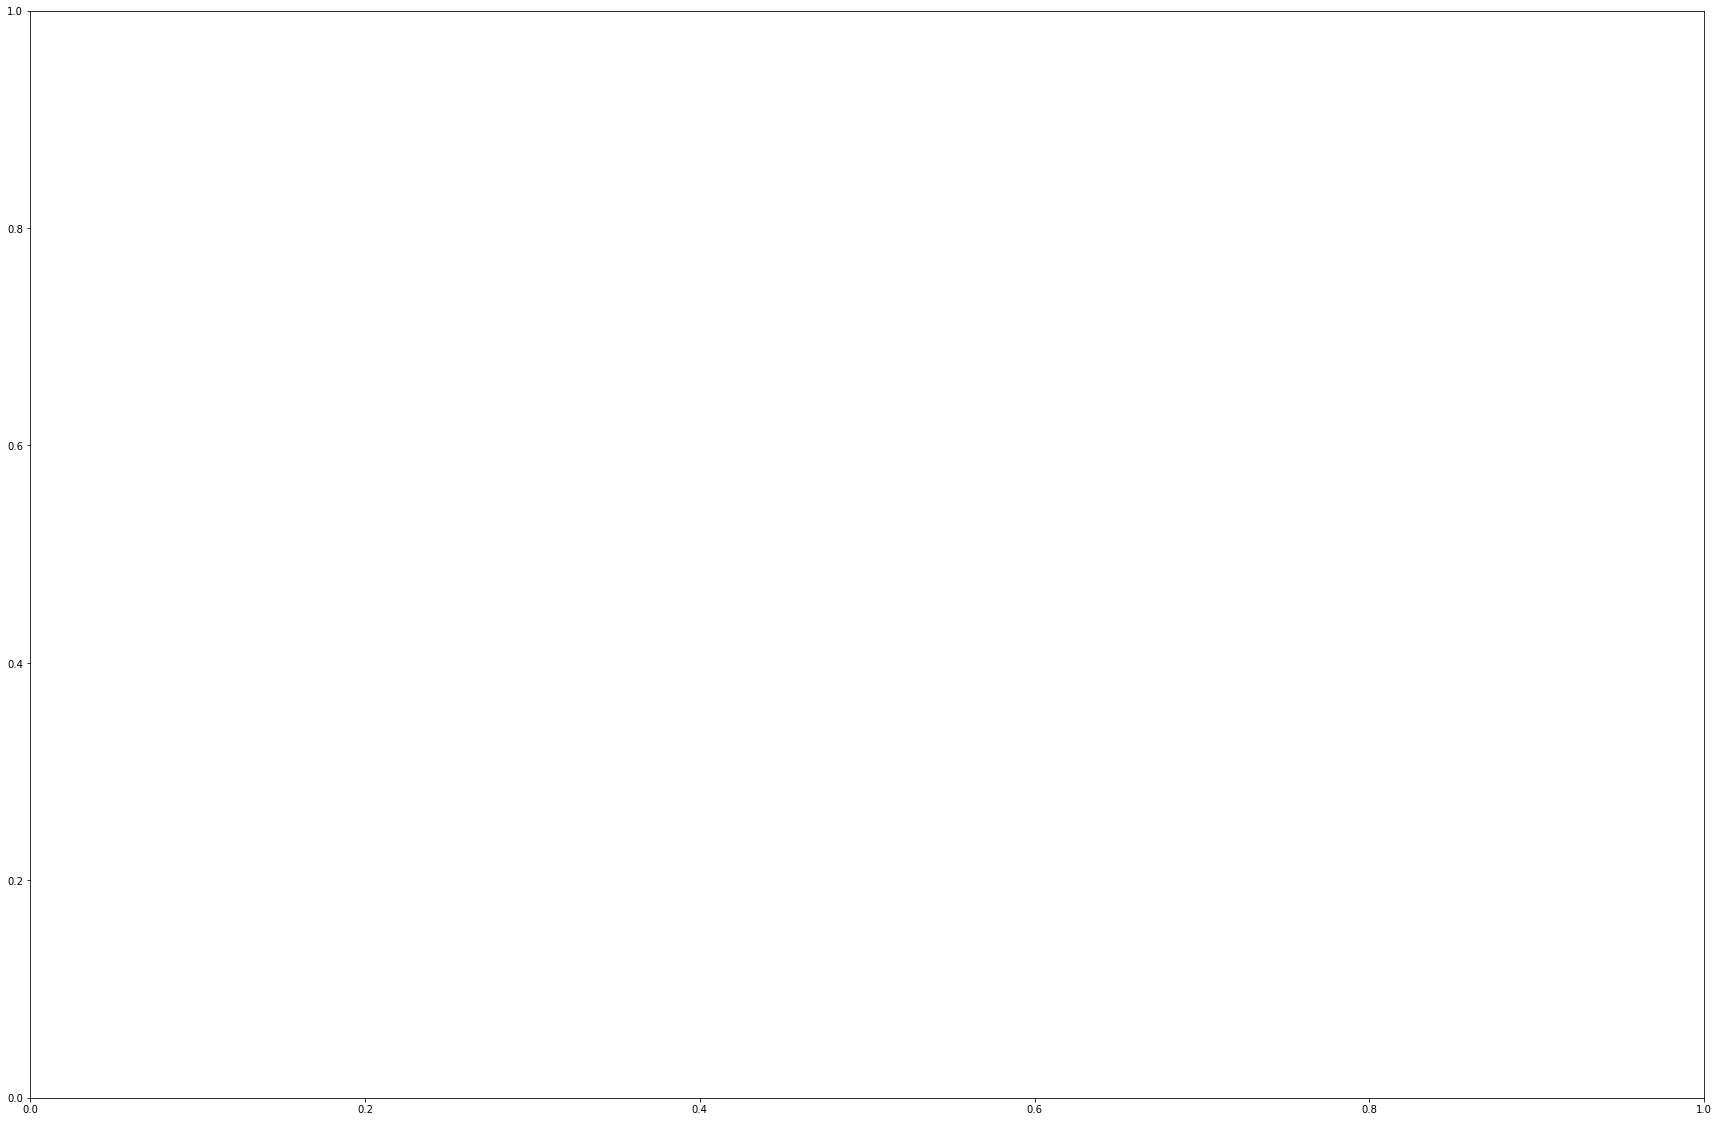

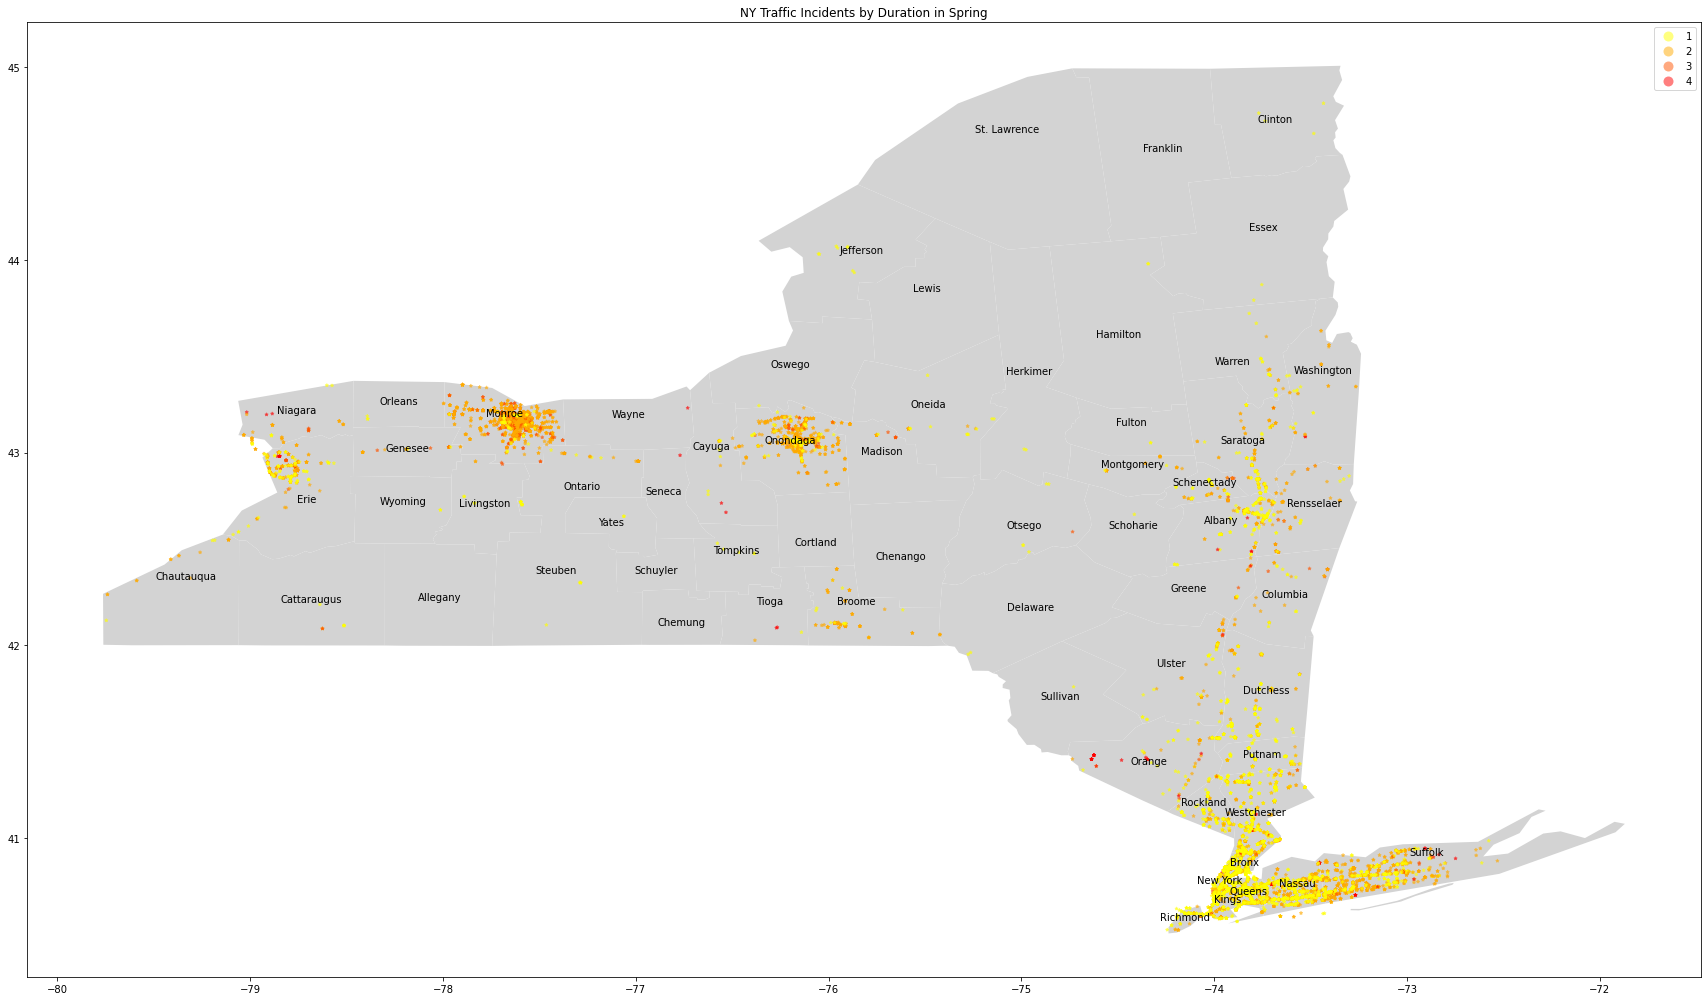

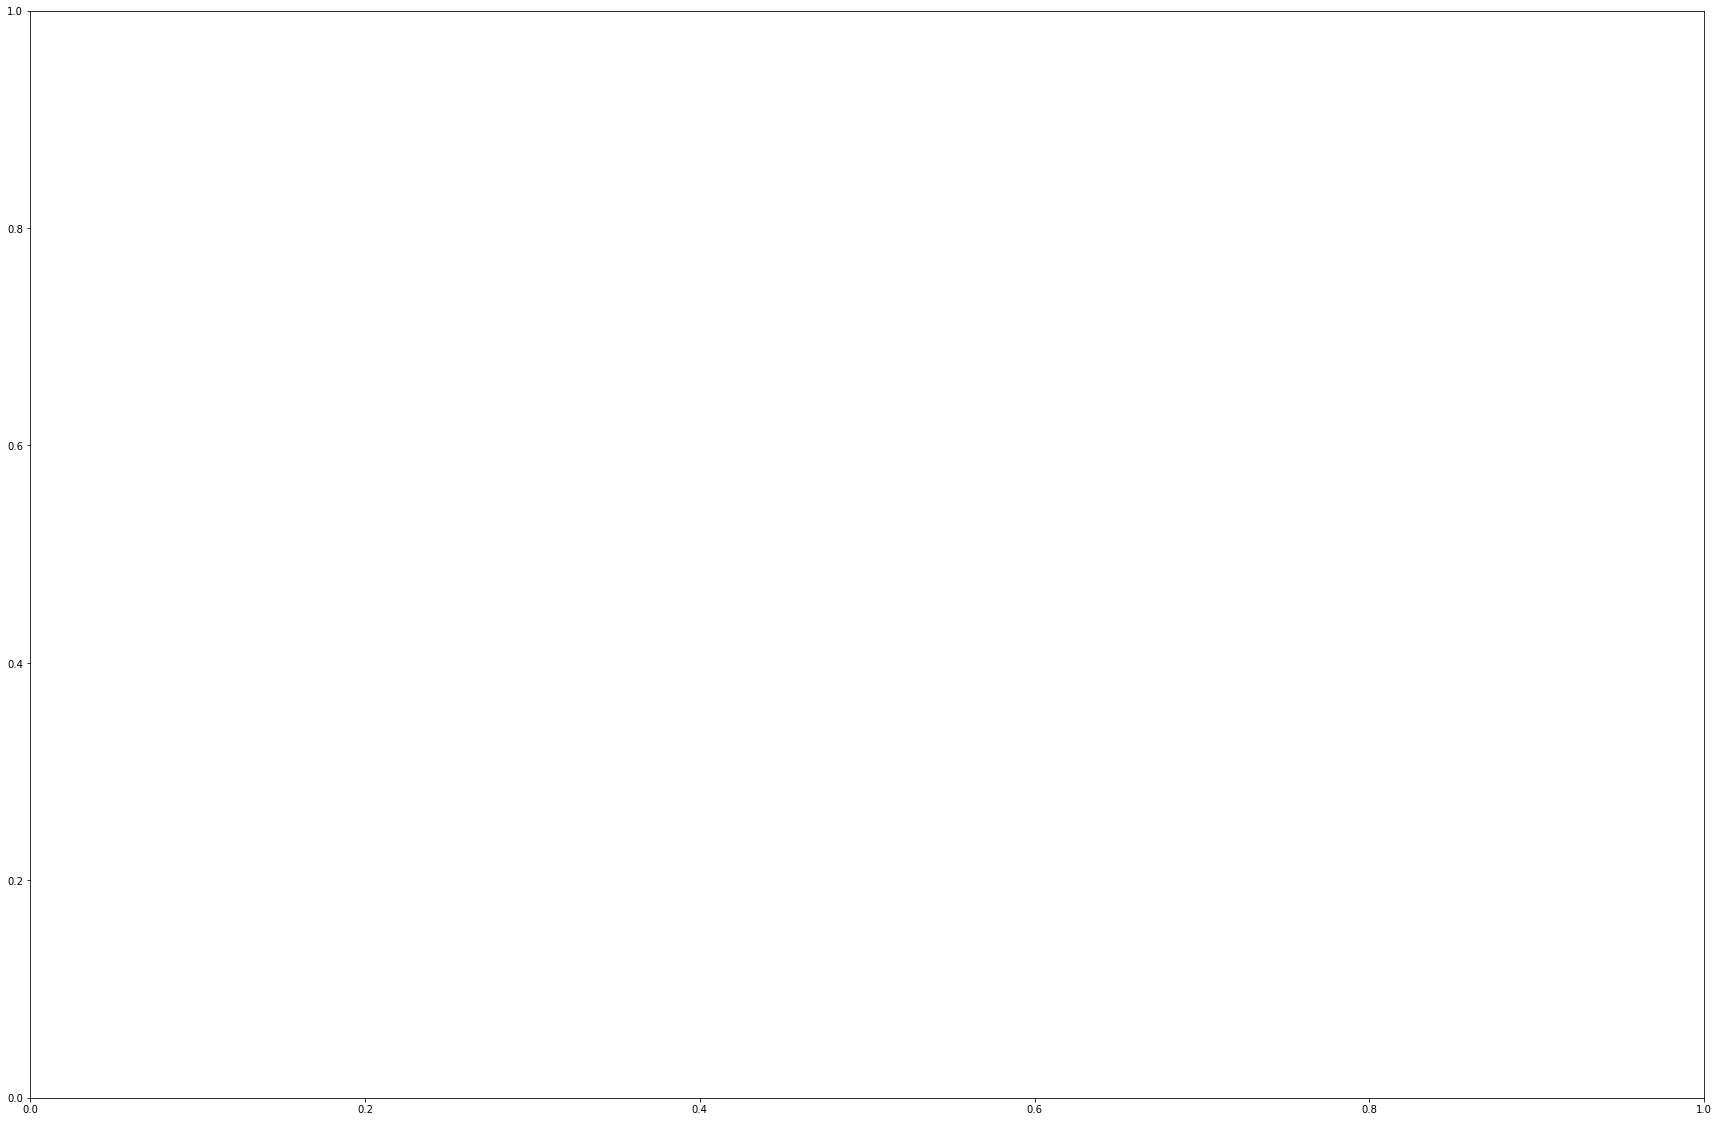

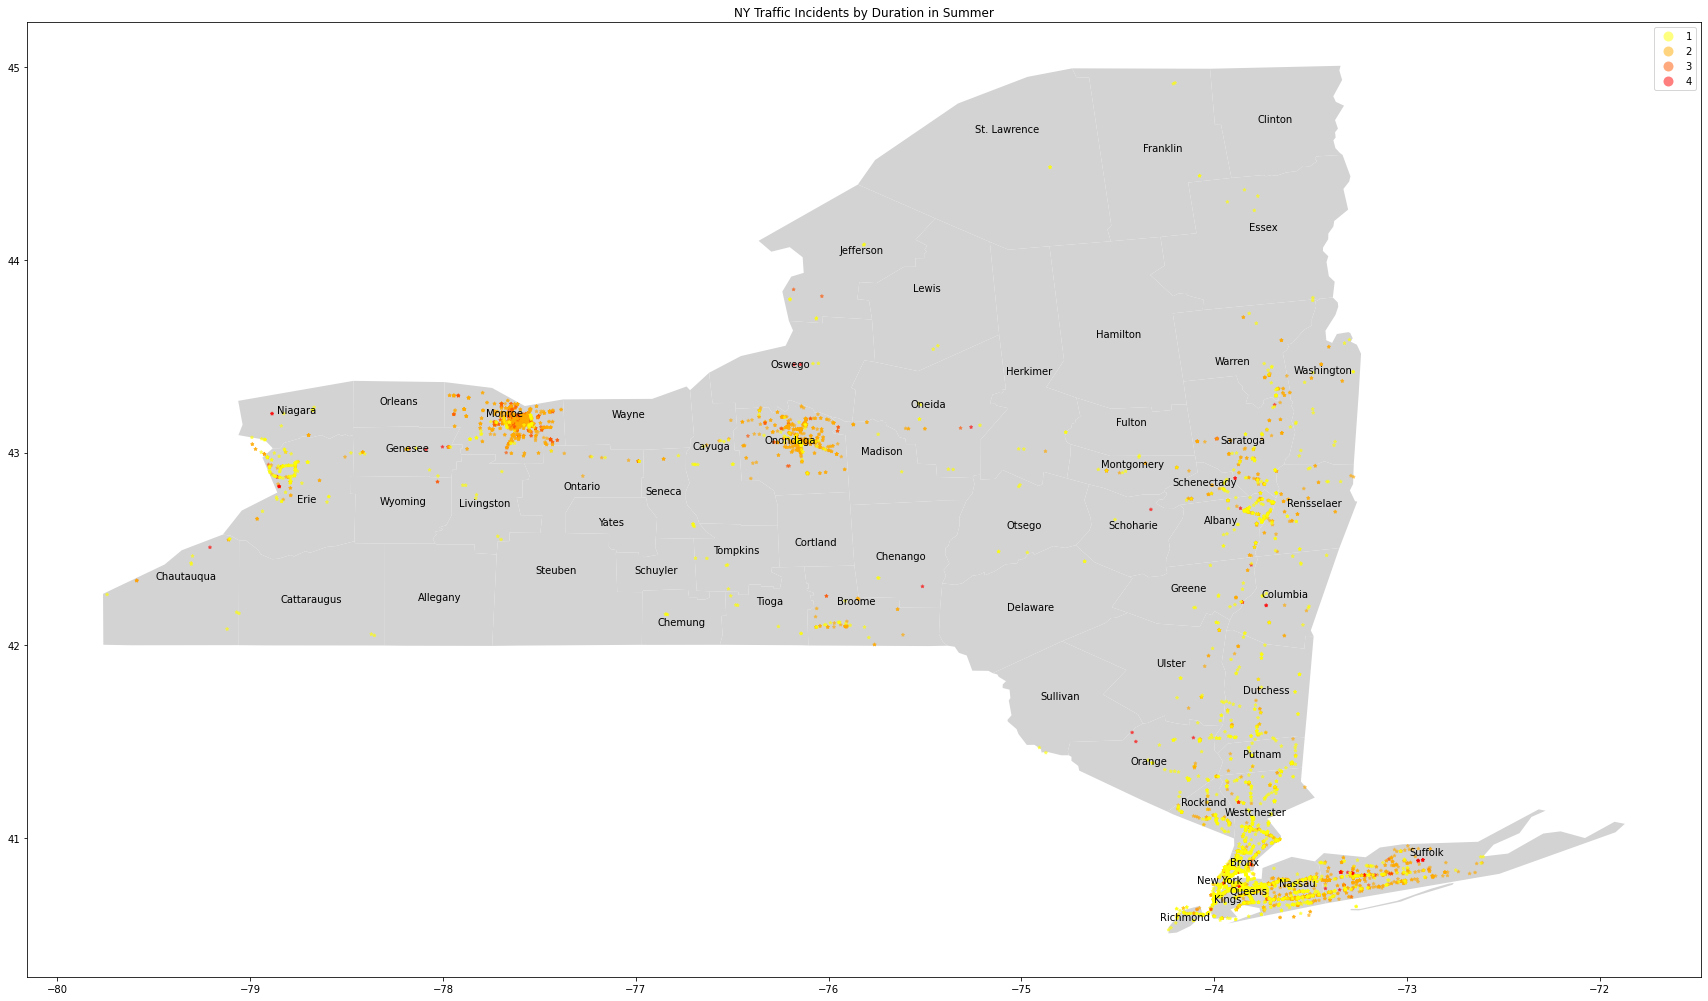

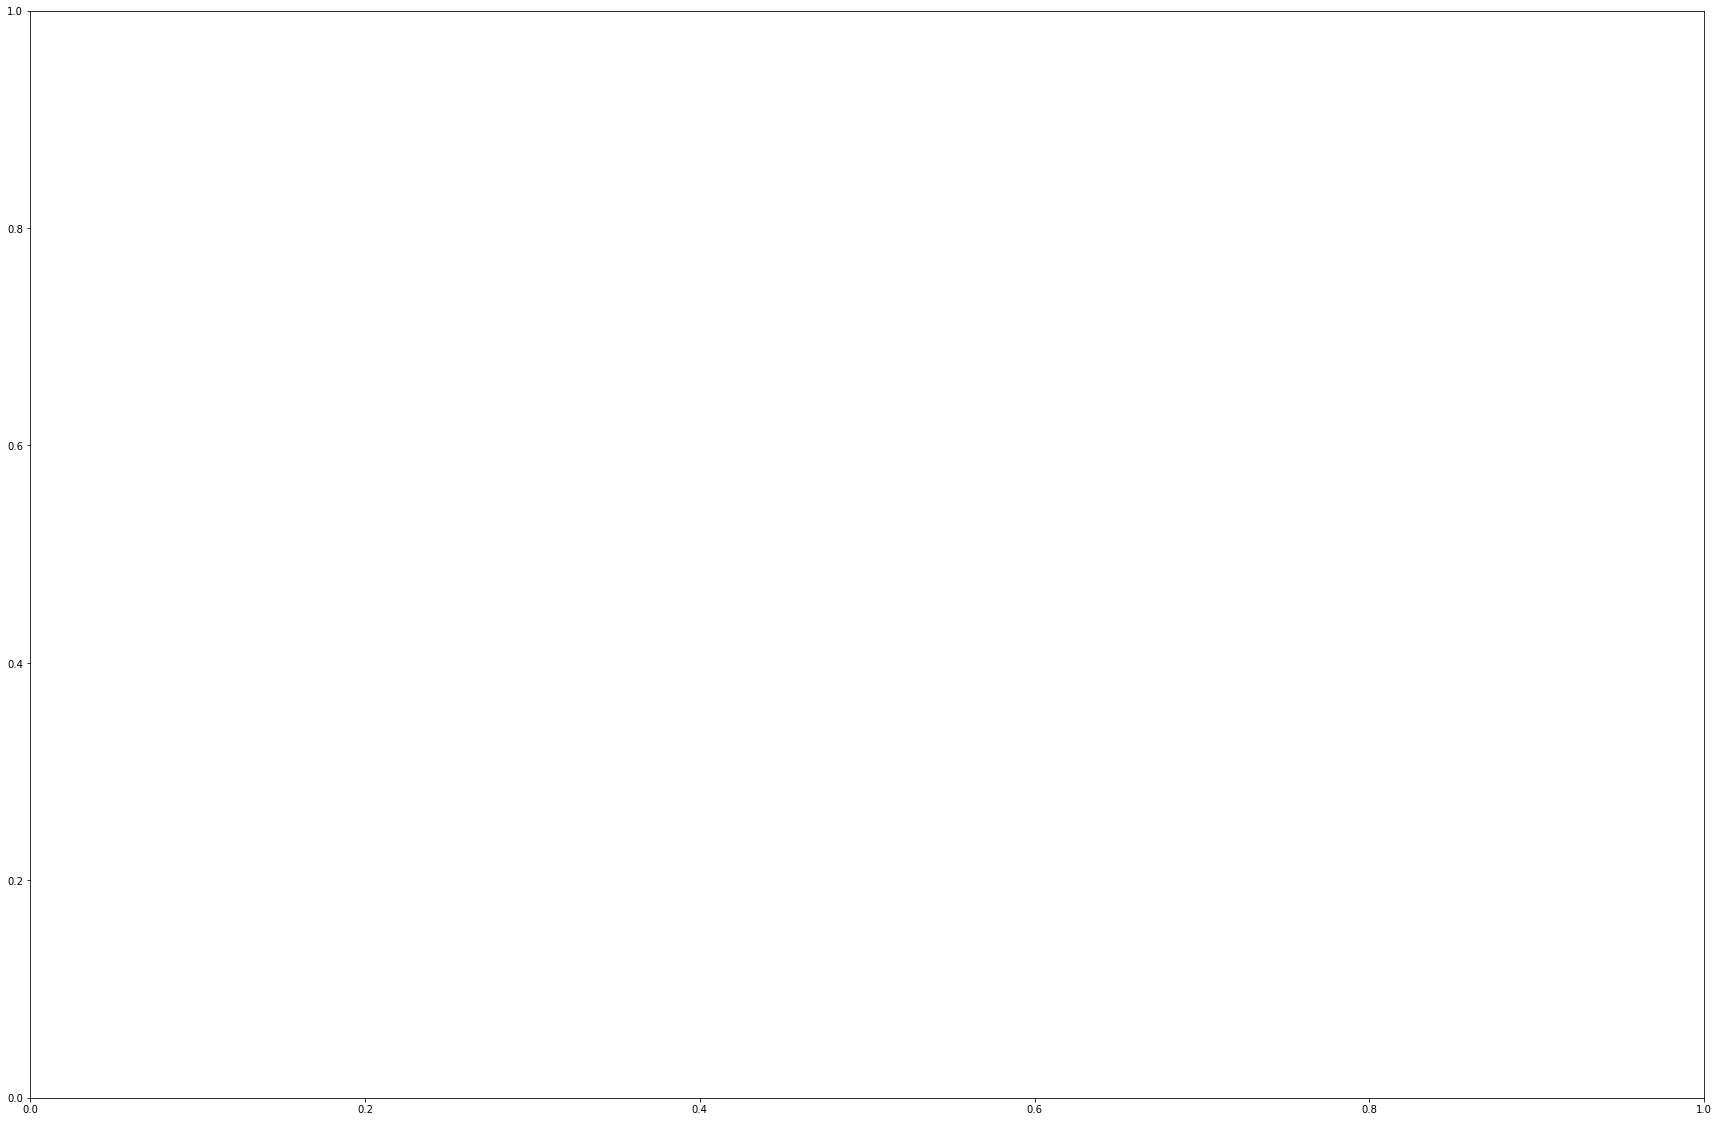

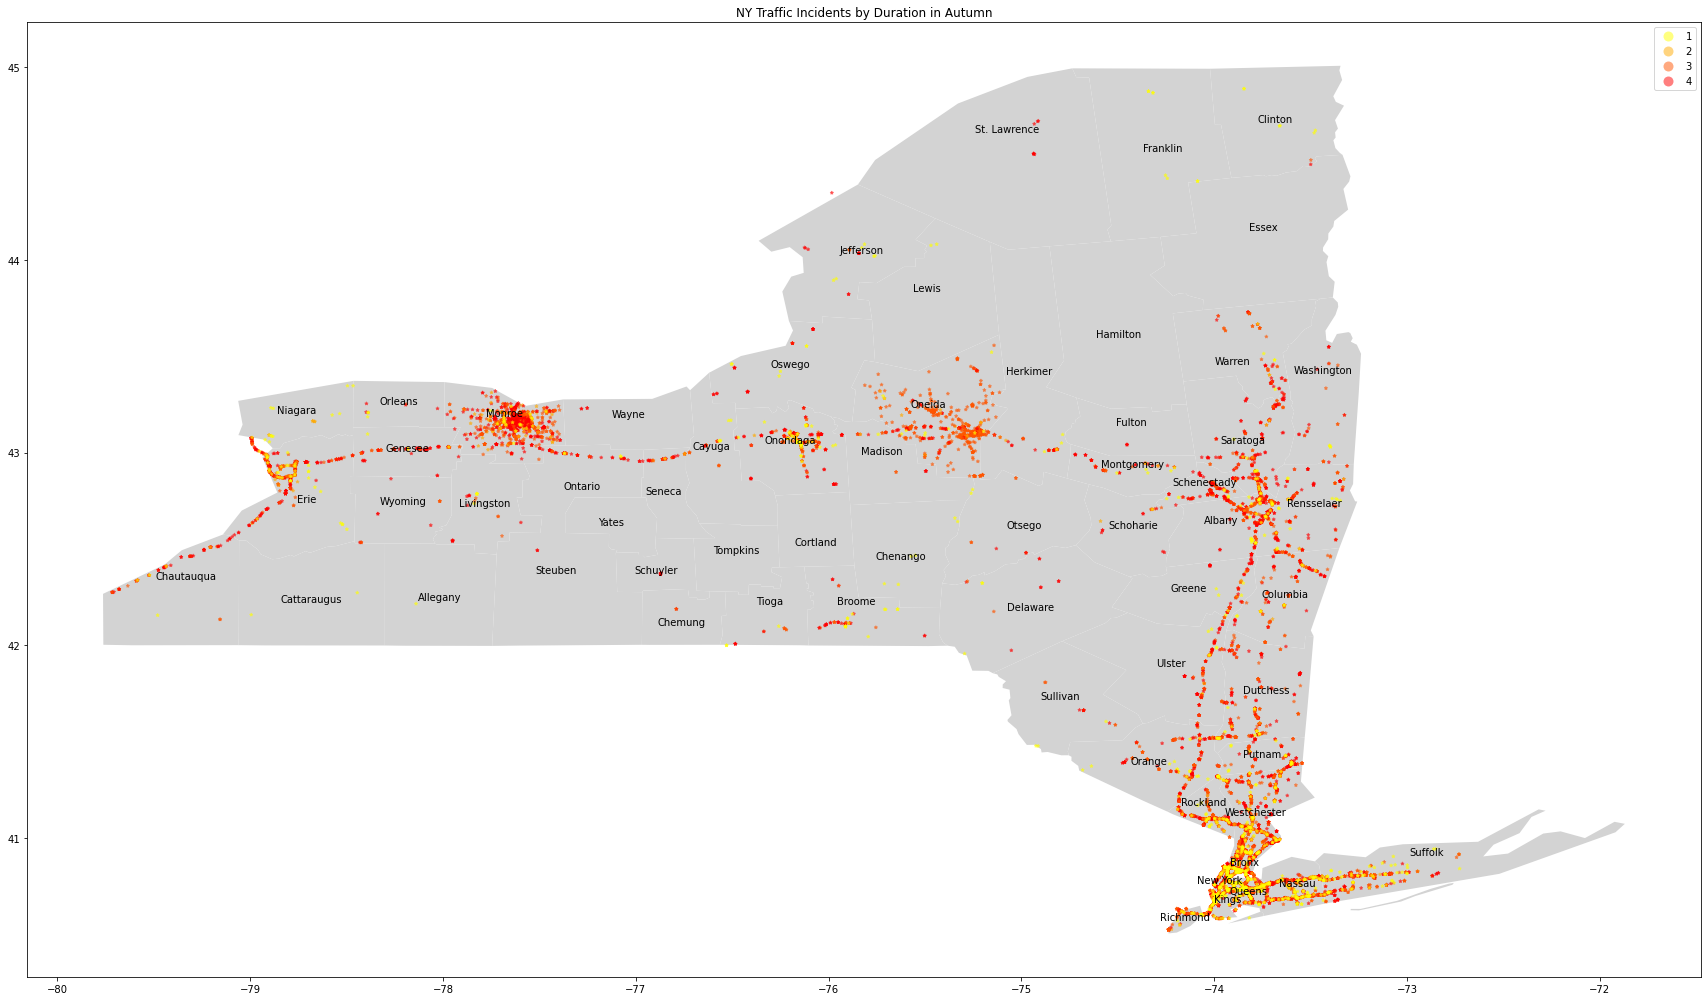

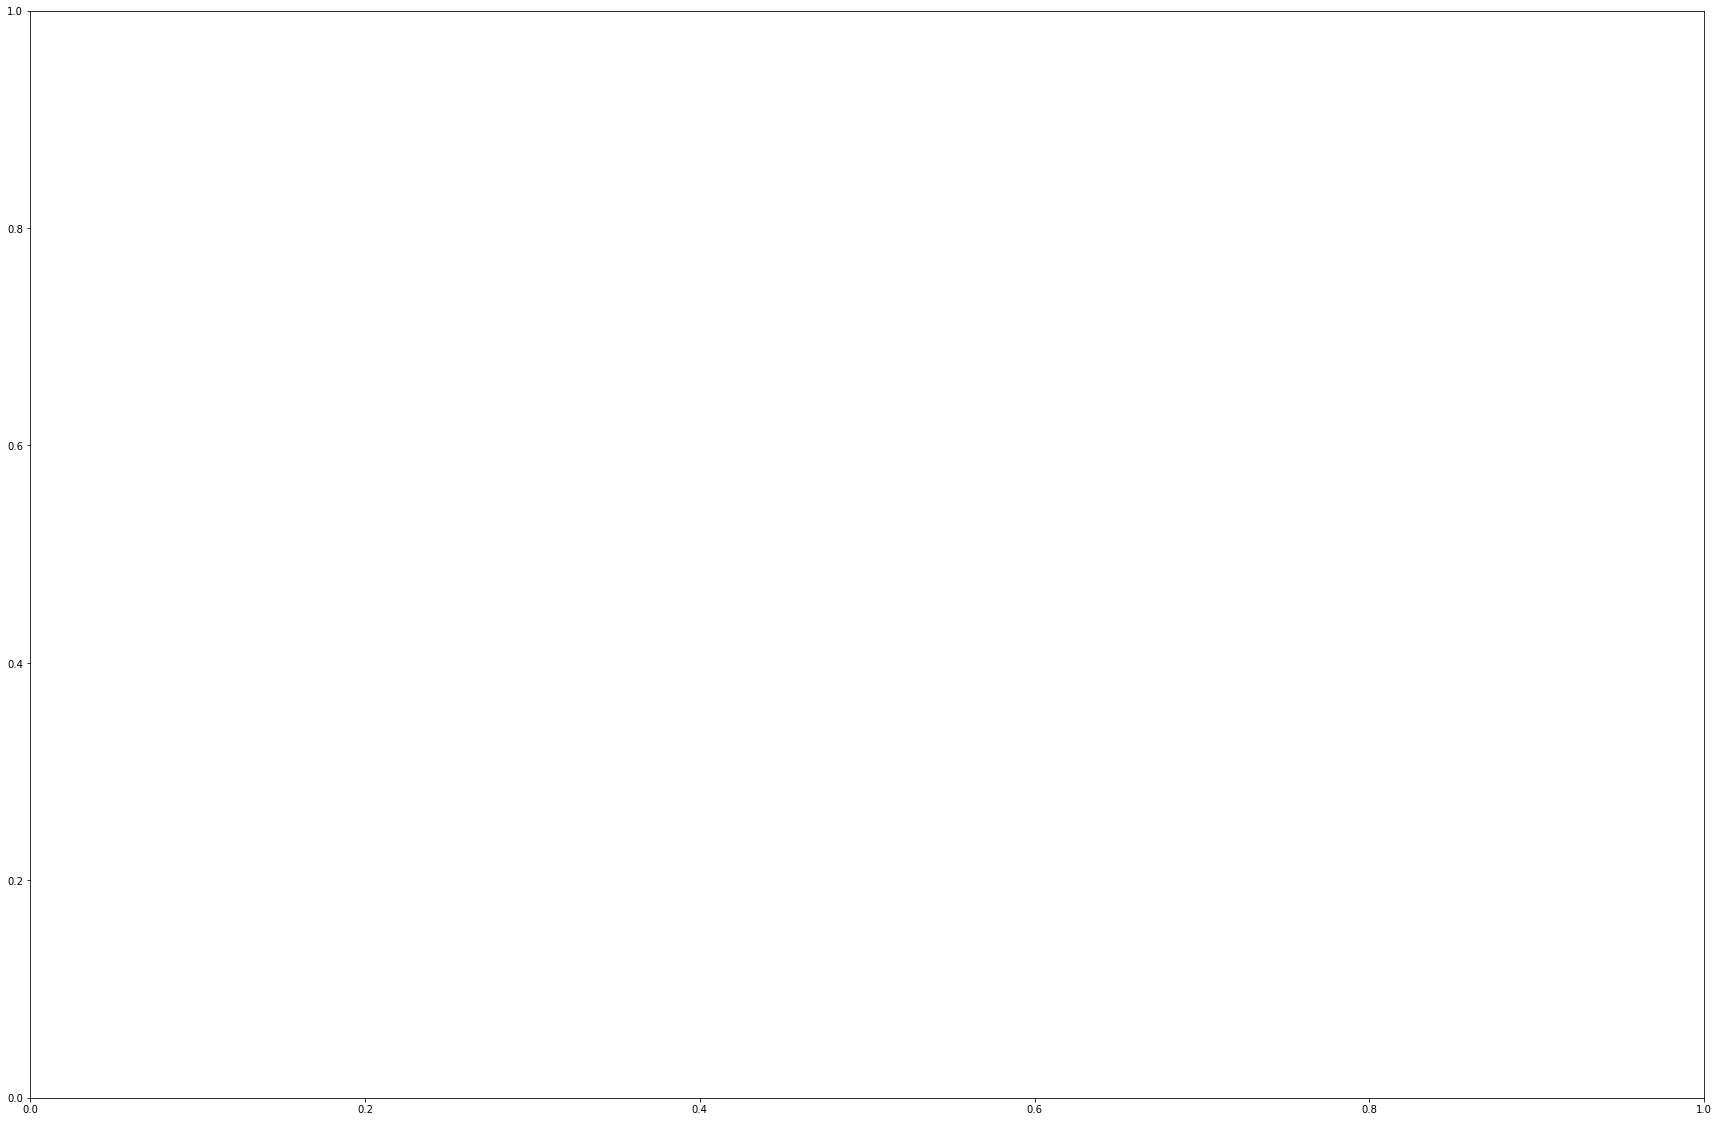

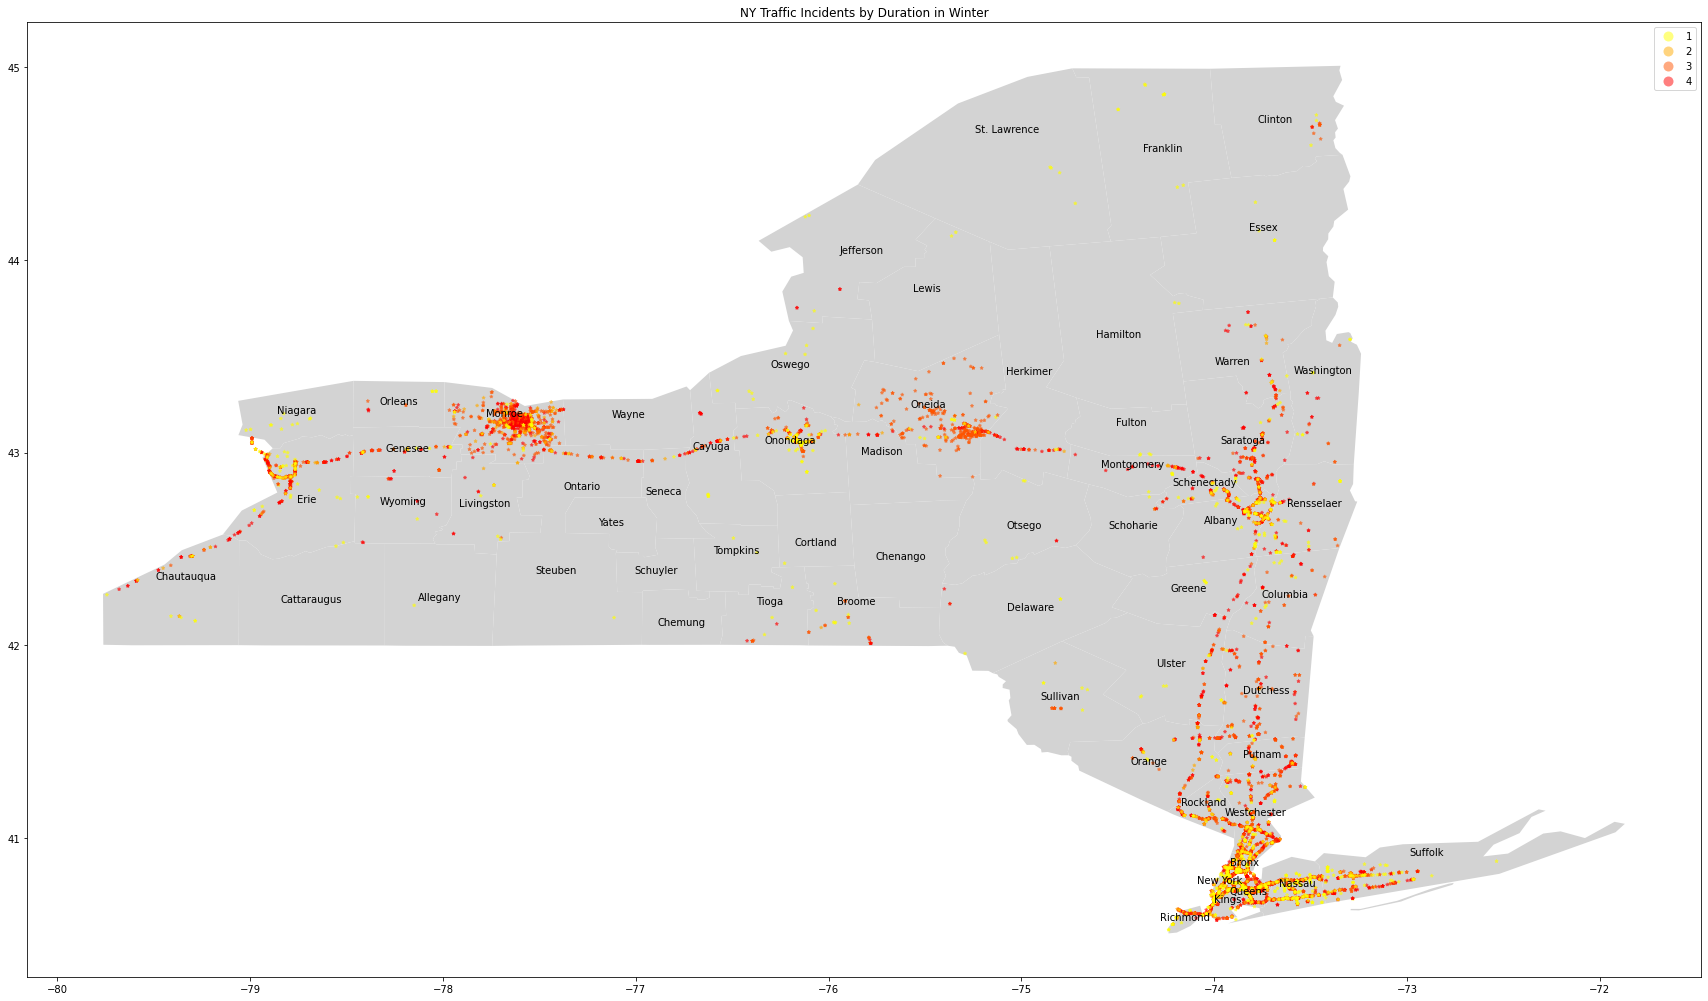

In [15]:
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
for season in seasons:
    geo_delay_season = df_cln[['delay_cat', 'coordinates']][df_cln['Time_of_Year'] == season]
    fig, ax = plt.subplots(1, figsize=(30,20))
    base = nyc_geo.plot(figsize=(30,20), color='lightgrey')
    base.set(title='NY Traffic Incidents by Duration in ' + season)
    geo_delay_season.plot(ax=base, column=geo_delay_season['delay_cat'], cmap='autumn_r', alpha=0.5, marker="*", markersize=10, categorical=True, legend=True)
    for i, row in nyc_geo.iterrows():
        base.annotate(s=row['county'], xy=row['coords'], horizontalalignment='center')